# MLP LAB2

In [145]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.datasets import *
import matplotlib.pyplot as plt
import copy

from utils import *
from InputUnit import *
from NeuralUnit import *
from Loss import *
from MLP import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1000 2


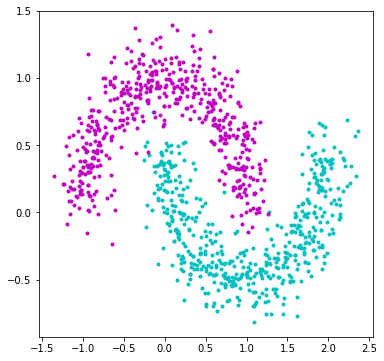

In [160]:
X,y = make_moons(n_samples = 1000,noise=0.15)#, factor=0.1)
n,d = X.shape
print(n,d)
plt.figure(1,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.c')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.m')

## Exercise n°1 : Network Creation

In [161]:
# Creation of the 3 Neural Units instances of our MLP
Nu10 = NeuralUnit(1,0)
Nu11 = NeuralUnit(1,1)
Nu20 = NeuralUnit(2,0)

# Creation of a Loss instance
LossUnit = Loss(y,2)

#Creation of the network
network = MLP(X,y,[2,2,1])

## Exercise n°2 : Forward pass

In [162]:
print(network.forward(4))

0.0644794240927075


## Exercise n°3 : Back Propagation

In [163]:

i = 0
archi = [d,20,1]
mlp = MLP(X,y,archi)
mlp.forward(i)
mlp.backprop(i)
epsi=1e-3
mlp2 = copy.deepcopy(mlp)
mlp2.net[1][0].w[0] = mlp.net[1][0].w[0]+epsi
print("numerical derivative is : ",(mlp2.forward(i) - mlp.forward(i))/epsi)
print("computed derivative is : ",mlp.net[1][0].w_grad[0])

numerical derivative is :  -0.06539113437609156
computed derivative is :  -0.06538595383206612


## Exercise n°4 : SGD training of the network

In [164]:
mlp.train(50,0.05)

epoch  1 / 50 ...
epoch  2 / 50 ...
epoch  3 / 50 ...
epoch  4 / 50 ...
epoch  5 / 50 ...
epoch  6 / 50 ...
epoch  7 / 50 ...
epoch  8 / 50 ...
epoch  9 / 50 ...
epoch  10 / 50 ...
epoch  11 / 50 ...
epoch  12 / 50 ...
epoch  13 / 50 ...
epoch  14 / 50 ...
epoch  15 / 50 ...
epoch  16 / 50 ...
epoch  17 / 50 ...
epoch  18 / 50 ...
epoch  19 / 50 ...
epoch  20 / 50 ...
epoch  21 / 50 ...
epoch  22 / 50 ...
epoch  23 / 50 ...
epoch  24 / 50 ...
epoch  25 / 50 ...
epoch  26 / 50 ...
epoch  27 / 50 ...
epoch  28 / 50 ...
epoch  29 / 50 ...
epoch  30 / 50 ...
epoch  31 / 50 ...
epoch  32 / 50 ...
epoch  33 / 50 ...
epoch  34 / 50 ...
epoch  35 / 50 ...
epoch  36 / 50 ...
epoch  37 / 50 ...
epoch  38 / 50 ...
epoch  39 / 50 ...
epoch  40 / 50 ...
epoch  41 / 50 ...
epoch  42 / 50 ...
epoch  43 / 50 ...
epoch  44 / 50 ...
epoch  45 / 50 ...
epoch  46 / 50 ...
epoch  47 / 50 ...
epoch  48 / 50 ...
epoch  49 / 50 ...
epoch  50 / 50 ...


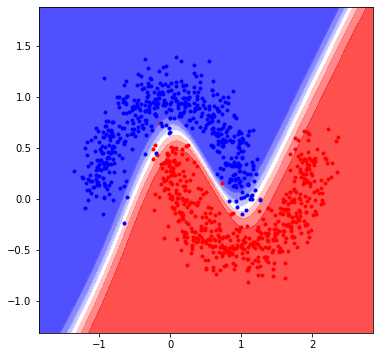

In [165]:
h = 0.02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z=[]
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z=np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11,x22,Z,cmap=plt.cm.bwr,alpha=.8)
plt.show()